In [1]:
import kex_data
import filefit as ff

In [2]:
hdrs = kex_data.get_sino_hdrs()
mhdrs = kex_data.get_sino_mainhdrs()
for h,m in zip(hdrs, mhdrs):
    filling = [h,m]
    mc_dir = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/motion_corrected"
    ff.prep_folder(mc_dir, filling)

In [3]:
mc_v_paths=ff.get_path_selection(mc_dir, '.v')[ : :-1]
print("paths:", mc_v_paths)

paths: ['C:/Users/petct/Desktop/Hugo/Code/PythonMEX/motion_corrected/cylinder_000_000.v', 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/motion_corrected/cannula_000_000.v']


In [4]:
import kex_headers

In [5]:
mc_recons = [ff.get_v_data(path) for path in mc_v_paths]
mc_recons = dict(zip(kex_data.PHANTOM_KEYS, mc_recons))

In [6]:
gated_recons = kex_data.get_v_data()
ref_recons = {pkey: 
              gated_recons[pkey+" 0"] for pkey in kex_data.PHANTOM_KEYS}

In [7]:
import volume_view as vv

In [8]:
import volume_view as vv
import visual
import matplotlib.pyplot as plt
def my_plot(img_dict, pos = [47,120,100]):
    nims = len(img_dict)
    fig, axes = plt.subplots(nrows=nims, ncols=3, figsize=(20, 7*nims))
    for (key,img), row in zip(img_dict.items(), axes):
        dimlabels = 'zyx'
        views = vv.plot_views(img, 
                      position=pos,
                      axes=row, 
                      dimlabels=dimlabels, 
                      img_title=key)
        visual.same_colorbar(fig, views, row)

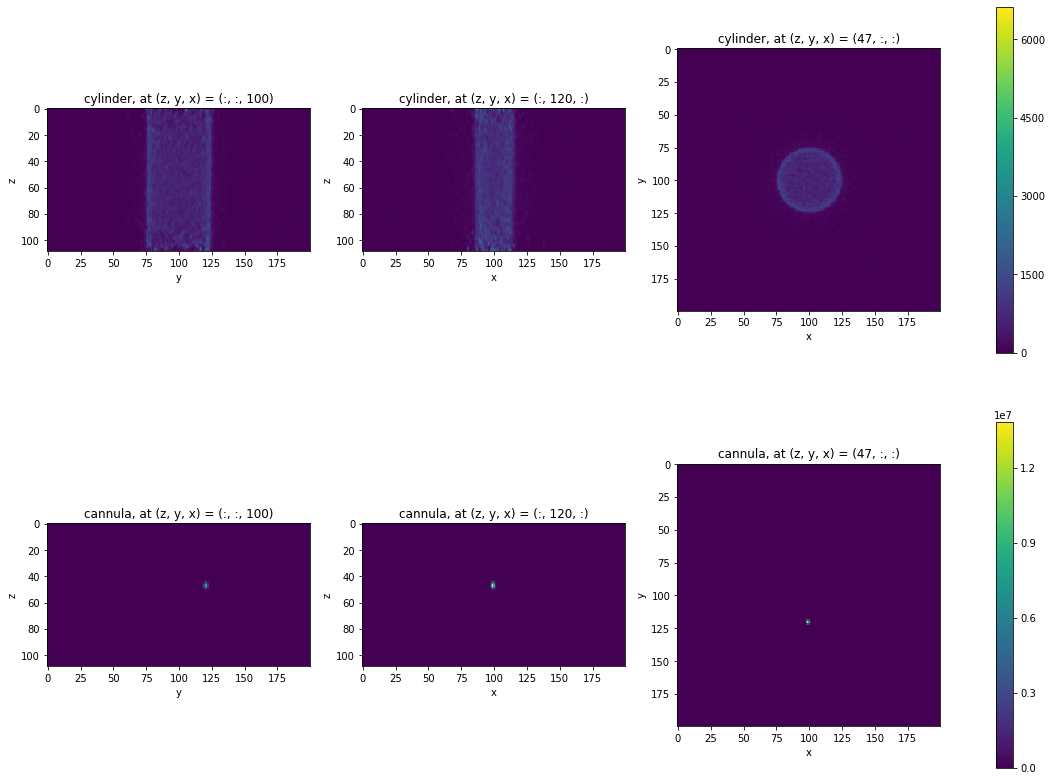

In [9]:
my_plot(ref_recons)

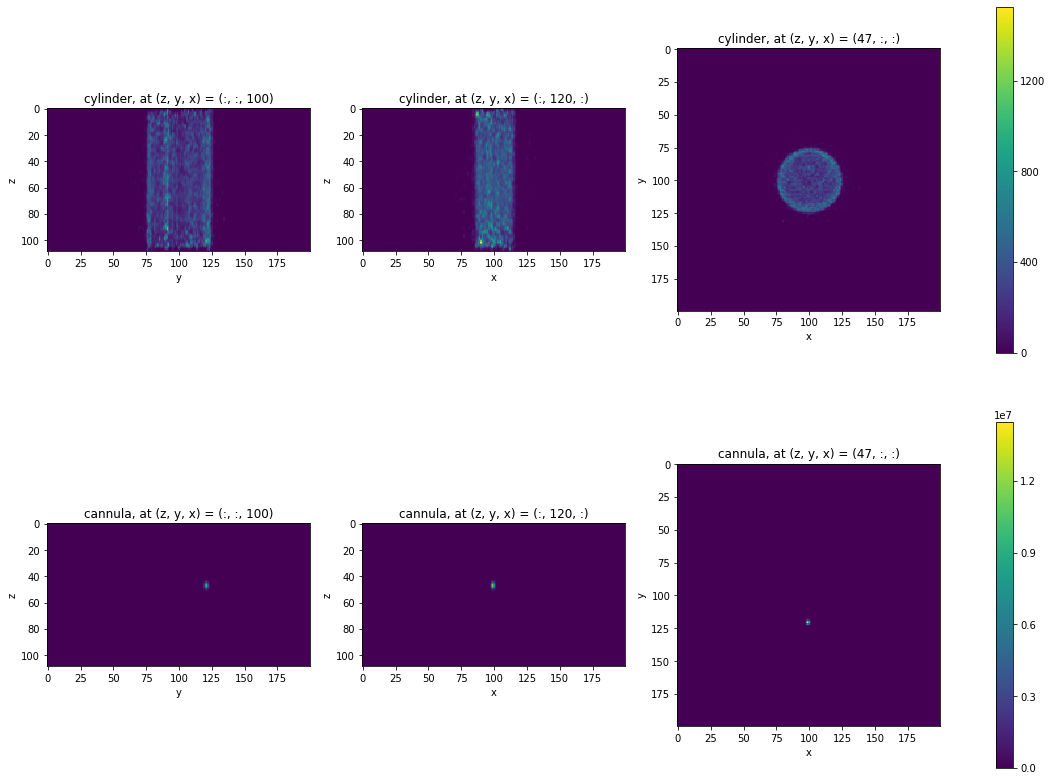

In [10]:
my_plot(mc_recons)

In [16]:
import numpy as np
def plot_image_profile(image, axis, position=[0,0,0], do_sum=False, do_scale=False):
    dimlabels = 'zyx'
    off_axes = np.arange(3)
    off_axes = off_axes[off_axes != axis]
    x = np.arange(image.shape[axis])
    if do_sum: 
        y = np.sum(image, axis = tuple(off_axes))
    else:
        y = vv.get_drill_crack(image,position, [axis])
    ylabel = "image intensity"
    if do_sum: ylabel = ylabel + " (sum)"
    if do_scale:
        scale = max(y)
        if scale == 0:  scale = 1
        y = y/scale
        ylabel = ylabel + " (rescaled)"
    plt.scatter(x,y, marker='.')
    plt.xlabel(dimlabels[axis])
    plt.ylabel(ylabel)

In [17]:
cylinders = [d['cylinder'] for d in [mc_recons, ref_recons]]
cannulas = [d['cannula'] for d in [mc_recons, ref_recons]]

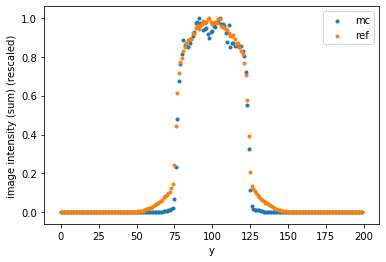

In [18]:
for image in cylinders:
    plot_image_profile(image, axis=1, do_sum=True, do_scale=True)
    plt.legend(["mc", "ref"])

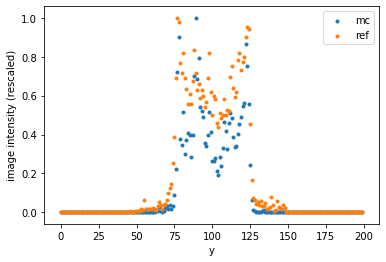

In [19]:
for image in cylinders:
    plot_image_profile(image, axis=1, position=[50,100,100], do_scale=True)
    plt.legend(["mc", "ref"])

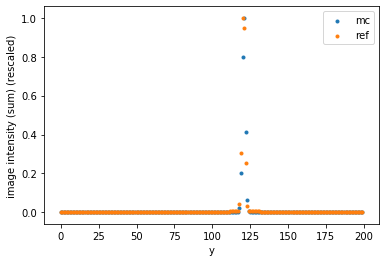

In [20]:
for image in cannulas:
    plot_image_profile(image, axis=1, do_sum=True, do_scale=True)
    plt.legend(["mc", "ref"])